<a href="https://colab.research.google.com/github/hrcn81/commonplace/blob/main/surplus/softmax_%2B_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('iris')

In [3]:
df = data.copy()

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df.iloc[:,0::2]
# df = df.iloc[:,1::2] + df.iloc[:,-1]
# df = df[['sepal_length','petal_length','species']]
# df = df[['sepal_width','petal_width','species']]

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [10]:
clf = LogisticRegression(multi_class = 'multinomial')

In [11]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [14]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [15]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [16]:
clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


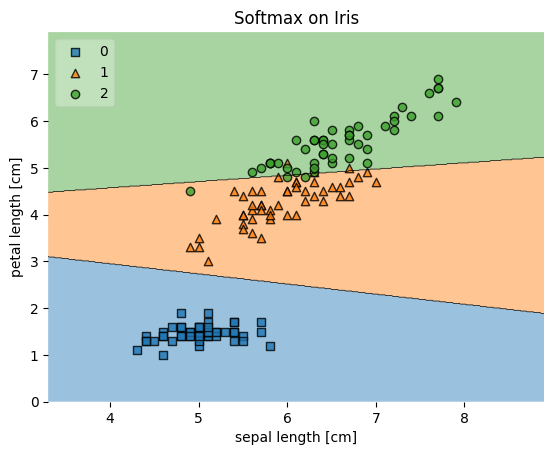

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf,legend = 2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

### KNN

In [18]:
iris = data.copy()

In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


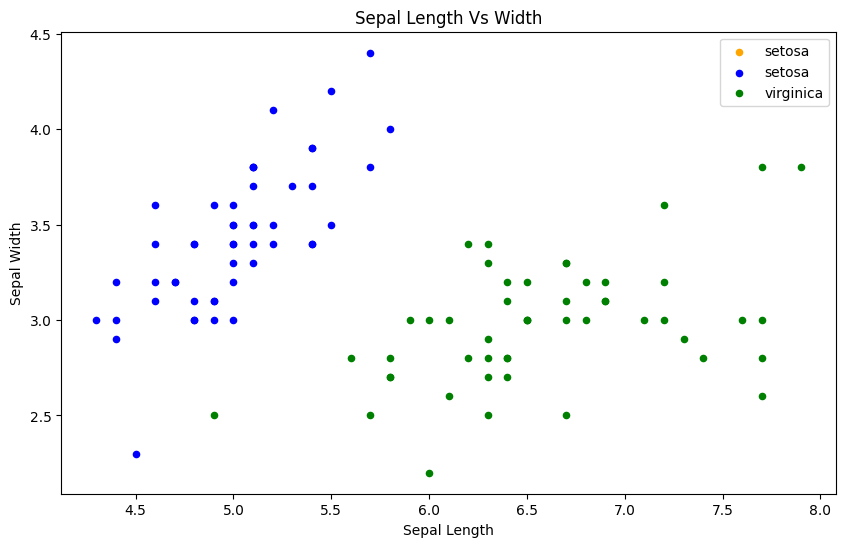

In [20]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='orange', label='setosa')
iris[iris.species=='setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='setosa', ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length Vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

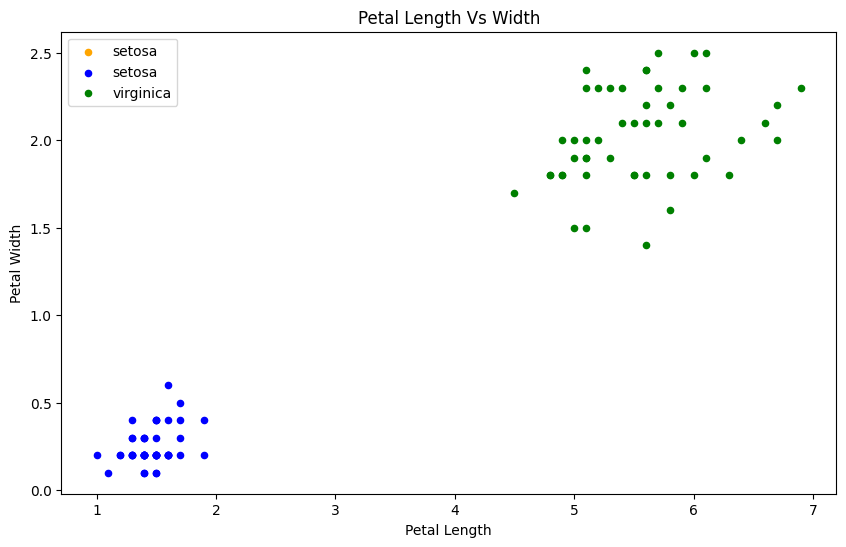

In [21]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='orange', label='setosa')
iris[iris.species=='setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='setosa', ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length Vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set Seaborn style
# sns.set(style="whitegrid")

# # Create figure and axis objects
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot data for each species
# sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='husl', ax=ax, s=100, alpha=0.7)

# # Set labels and title
# ax.set_xlabel("Petal Length", fontsize=12)
# ax.set_ylabel("Petal Width", fontsize=12)
# ax.set_title("Petal Length Vs Width", fontsize=14)

# # Adjust legend
# ax.legend(title='Species', fontsize=10, title_fontsize=12)

# # Show plot
# plt.show()


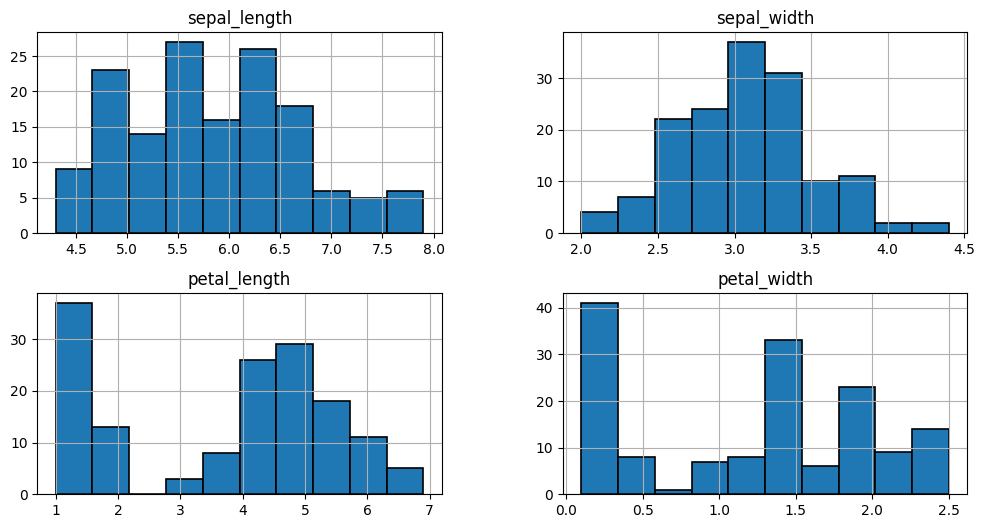

In [23]:
iris.hist(edgecolor = 'black',linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [24]:
train,test = train_test_split(iris,test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [25]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
44,5.1,3.8,1.9,0.4,setosa
47,4.6,3.2,1.4,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica


In [26]:
train_X = train.iloc[:,:4]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:4]
test_y = test.iloc[:,-1]

In [27]:
print(train_X.head())
print(test_X.head())

     sepal_length  sepal_width  petal_length  petal_width
59            5.2          2.7           3.9          1.4
51            6.4          3.2           4.5          1.5
44            5.1          3.8           1.9          0.4
47            4.6          3.2           1.4          0.2
141           6.9          3.1           5.1          2.3
     sepal_length  sepal_width  petal_length  petal_width
65            6.7          3.1           4.4          1.4
115           6.4          3.2           5.3          2.3
70            5.9          3.2           4.8          1.8
67            5.8          2.7           4.1          1.0
127           6.1          3.0           4.9          1.8


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [29]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('Accuracy of KNN is :',metrics.accuracy_score(prediction,test_y))

Accuracy of KNN is : 0.9777777777777777


([<matplotlib.axis.XTick at 0x781eb1190580>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

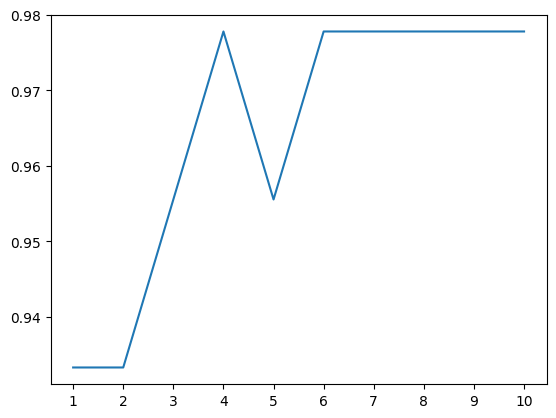

In [30]:
a_index = list(range(1,11))
a = []
x = [1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(a_index,a)
plt.xticks(x)

In [31]:
petal = iris.iloc[:,2:]
sepal = iris[['sepal_length','sepal_width','species']]

In [32]:
train_p,test_p = train_test_split(petal,test_size = 0.3,random_state = 0)
train_x_p = train_p[['petal_width','petal_length']]
train_y_p = train_p.species
test_x_p = test_p[['petal_width','petal_length']]
test_y_p = test_p.species

train_s,test_s = train_test_split(sepal,test_size = 0.3,random_state = 0)
train_x_s = train_s[['sepal_width','sepal_length']]
train_y_s = train_s.species
test_x_s = test_s[['sepal_width','sepal_length']]
test_y_s = test_s.species

In [33]:
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('Accuracy of Petal by KNN : ',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('Accuracy of Sepal by KNN : ',metrics.accuracy_score(prediction,test_y_s))

Accuracy of Petal by KNN :  0.9777777777777777
Accuracy of Sepal by KNN :  0.7333333333333333


In [34]:
# d1 = df.iloc[:,:2]

# for i in d1:
#     print(d1)

In [35]:
# print(iris.iloc[:, :2])

In [36]:
# pd.set_option('display.max_rows', None)
# print(iris.iloc[:,:2])

In [37]:
# print(iris.iloc[0:-1:1, :2])